# Predicting Clinical Trial Terminations
### Notebook 2: Preprocessing & EDA

**Author: Clement Chan**

---
Notes on the notebook:
- The previous notebook consists of the raw dataset and the steps involved in cleaning. We also performed preliminary EDA and highlighted the distribution of important columns and analyzed what potential features we should include in the model.
- In this notebook, we will complete a second round of more in-depth cleaning and exploratory data analysis. Our goal is to create a baseline model for statistical analysis, prepare for feature engineering and modelling.

### Data Dictionary for this notebook that is based on clinicaltrials.gov:

---

| Column | Description                                  |Data Type|
|-------|--------------------------------------------|-------|
| Study Title | Title of the Clinical Trial           | object |
| Study Status | Categorical column displaying the current position of the study | object (could classify into dummies) |
| Brief Summary | Short description of the clinical study (Includes study hypothesis) | object |
| Study Results | Whether the results are posted (yes or no) | object (turn to binary?)|
| Conditions | Primary Disease or Condition being studied     | object |
| Interventions | The methods used in the trial to reach the outcome                 | object |
| Primary Outcome Measures | Description of specific primary outcome | object |
| Secondary Outcome Measures | Description of specific secondary outcome | object |
| Sponsor | The corporation or agency that initiates the study | object |
| Collaborators | Other organizations that provide support | object |
| Sex | All: No limit on eligibility based on sex, Male: Only male participants, Female: Only female participants | object (Could change into binary or dummies) |
| Age | Relative age of the participants? Probably need to clarify/change up the name of the values | object (could classify this into dummies)|
| Phases | Clinical trial phase of the study (drug)... need to classify this futher. | object (dummies?)|
| Enrollment | Total estimated number of participants in a study or total actual enrollment? | float -> int |
| Funder Type | Funding type in category? | object (could classify into dummies) |
| Study Type | Interventional, Observational, or Expanded Access | object (definitely dummies) |
| Study Design | Study design based on study type | object |
| Start Date | Estimated/Actual date the first participant was enrolled | object -> date |
| Primary Completion Date | Date the final participant was examined for the first outcome | object -> date |
| Completion Date | Date the final participant was examined | object -> date |
| First Posted | Date the clinical trial was first posted to the public      | object -> date  |
| Last Update Posted | Date the clinical trial was last posted to the public   | object -> date |
| Locations | Where the clinical study will be held | object |


**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

<a id = 'toc'><a/>
## Table of Contents

---
1. [Data Preprocessing](#prep)


**Load the dataset**

In [2]:
# make sure to not include the index_col
df = pd.read_csv('updated_ctg.csv', index_col = 0)

# First 5 rows of dataset
df.head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,...,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
0,Effectiveness of a Problem-solving Interventio...,COMPLETED,We will conduct a two-arm individually randomi...,NO,"Mental Health Issue (E.G., Depression, Psychos...",behavioral: pride 'step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...","Mental health symptoms, The adolescent-reporte...",Sangath,Harvard Medical School (HMS and HSDM)|London S...,...,250,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-08-20,2019-01-20,2019-02-28,2018-08-14,2019-05-21,"Sangath, New Delhi, Delhi, 110016, India"
1,Oral Ketone Monoester Supplementation and Rest...,RECRUITING,People who report subjective memory complaints...,NO,Cerebrovascular Function|Cognition,other: placebo|dietary_supplement: β-ohb,"Brain network connectivity, Functional connect...","Working memory, Computer battery to assess wor...",McMaster University,"Alzheimer's Society of Brant, Haldimand Norfol...",...,30,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,2023-10-25,2024-08,2024-08,2023-08-15,2023-12-01,"McMaster University, Hamilton, Ontario, L8S 4K..."
2,Investigating the Effect of a Prenatal Family ...,COMPLETED,The purpose of this study is to measure the di...,NO,Focus: Contraceptive Counseling|Focus: Postpar...,other: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...","Intent to use contraception in the future, 6 m...",Planned Parenthood League of Massachusetts,Society for Family Planning Research Fund,...,176,OTHER,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2013-08,2014-12,2014-12,2013-05-15,2015-08-17,Palestinian Ministry of Health Maternal Child ...
3,Pre-exposure Prophylaxis (PrEP) for People Who...,WITHDRAWN,People who inject drugs (PWID) experience high...,NO,Intravenous Drug Abuse,behavioral: prep uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",Participant satisfaction with intervention con...,Boston University,National Institute on Drug Abuse (NIDA),...,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-03,2022-03,2022-03,2019-03-11,2021-03-10,unknown
4,Tailored Inhibitory Control Training to Revers...,COMPLETED,Insufficient inhibitory control is one pathway...,NO,Smoking|Alcohol Drinking|Prescription Drug Abu...,behavioral: person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",Far transfer to a task related to inhibitory c...,University of Oregon,none,...,103,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2014-09,2016-04,2016-05,2016-10-26,2016-10-26,"University of Oregon, Social and Affective Neu..."


Let's find the total number of rows and columns in the data.

In [3]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 482350 rows and 23 columns.


Check the information of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 482350 entries, 0 to 482349
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Study Title                 482350 non-null  object
 1   Study Status                482350 non-null  object
 2   Brief Summary               482350 non-null  object
 3   Study Results               482350 non-null  object
 4   Conditions                  482350 non-null  object
 5   Interventions               482350 non-null  object
 6   Primary Outcome Measures    482350 non-null  object
 7   Secondary Outcome Measures  482350 non-null  object
 8   Sponsor                     482350 non-null  object
 9   Collaborators               482350 non-null  object
 10  Sex                         482350 non-null  object
 11  Age                         482350 non-null  object
 12  Phases                      482350 non-null  object
 13  Enrollment                  482350

In the previous notebook, our approach was to drop columns that contain a large amount of missing values, and impute them with the string 'unknown', 'missing', and 'none'. Now, we will target specific columns that seem to have a big impact or significance in determining the `Study Status` variable.

Since the `Study Status` column is our main dependent variable that we are predicting. Let's explore the distribution again, and see if we can minimize the amount of unique values or categories.
- Start by looking at the value counts
- Visualize the distribution of the categories
- Group common categories or remove categories that are insignificant to the model.

In [5]:
df['Study Status'].value_counts()

Study Status
COMPLETED                    263380
RECRUITING                    66150
UNKNOWN                       64828
TERMINATED                    28014
NOT_YET_RECRUITING            20055
ACTIVE_NOT_RECRUITING         19702
WITHDRAWN                     13716
ENROLLING_BY_INVITATION        3931
SUSPENDED                      1646
NO_LONGER_AVAILABLE             446
AVAILABLE                       259
APPROVED_FOR_MARKETING          197
TEMPORARILY_NOT_AVAILABLE        26
Name: count, dtype: int64

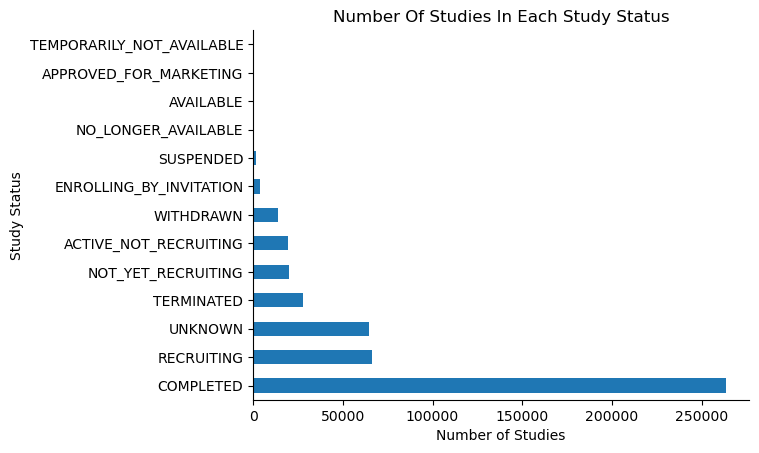

In [9]:
# Visualize counts with a graph
plt.figure()

df['Study Status'].value_counts().plot(kind='barh')

plt.title('Number of Studies in Each study status'.title())
plt.ylabel('Study Status')
plt.xlabel('Number of Studies')

sns.despine()
plt.show()

Most of the studies have been completed, which can cause some data imbalance in other classes such as our targeted 'Terminated' category. Let's continue with the cleaning, and see where we can group common categories together starting with the lowest counts `TEMPORARILY_NOT_AVAILABLE`.

In [11]:
# this option displays all columns in the dataframe
pd.options.display.max_columns = None

In [31]:
# slice out rows where study status is TEMPORARILY_NOT_AVAILABLE
df[df['Study Status'] == 'TEMPORARILY_NOT_AVAILABLE'].head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
11239,Thrombosomes for Expanded Access Use,TEMPORARILY_NOT_AVAILABLE,Expanded use of Thrombosomes where a clinical ...,NO,Bleeding,biological: thrombosomes®,unknown,none,"Cellphire Therapeutics, Inc.",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2020-11-06,2022-01-28,unknown
47190,"A Phase I Clinical Study of the Safety, Tolera...",TEMPORARILY_NOT_AVAILABLE,This study is designed to multiple dose and do...,NO,Healthy,drug: hx-1171,unknown,none,"Biotoxtech Co., Ltd",none,MALE,ADULT,NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2013-06-28,2013-06-28,"Asan Medical Center, Special City of Seoul, Ko..."
53091,Treating Amyotrophic Lateral Sclerosis (ALS) W...,TEMPORARILY_NOT_AVAILABLE,R(+) pramipexole dihydrochloride monohydrate \...,NO,Amyotrophic Lateral Sclerosis,drug: r(+) pramipexole dihydrochloride monohyd...,unknown,none,"Bennett, James P., Jr., M.D., Ph.D.",University of Pittsburgh|University of Nebraska,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDIV,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2008-01-16,2012-07-25,unknown
53366,Development of a Fall Prevention and Fall Dete...,TEMPORARILY_NOT_AVAILABLE,The investigators plan to conduct a first-stag...,NO,Parkinson's Disease,other: portable motion detector,unknown,none,Far Eastern Memorial Hospital,none,ALL,"CHILD, ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2010-12-20,2010-12-20,unknown
104237,Post-trial Access for Nipocalimab in Participa...,TEMPORARILY_NOT_AVAILABLE,The purpose of this post-trial access (PTA) pr...,NO,Warm Autoimmune Hemolytic Anemia,drug: nipocalimab,unknown,none,"Janssen Research & Development, LLC",none,unknown,"CHILD, ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2022-02-03,2024-01-23,unknown


We can see that the rows where **(Study Status = Temporarily_not_available)** are missing a lot of information in the columns `Outcome_measures`, `Collaborators`, `Study Design`, and some `Locations`. Since this study status is neither completed or terminated, it doesn't provide any meaningful information to the model and we should remove these rows from the dataset.

In [32]:
# drop rows where study status = temp_not_available
df.drop(index = df[df['Study Status'] == 'TEMPORARILY_NOT_AVAILABLE'].index, inplace = True)

In [33]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                  263380
RECRUITING                  66150
UNKNOWN                     64828
TERMINATED                  28014
NOT_YET_RECRUITING          20055
ACTIVE_NOT_RECRUITING       19702
WITHDRAWN                   13716
ENROLLING_BY_INVITATION      3931
SUSPENDED                    1646
NO_LONGER_AVAILABLE           446
AVAILABLE                     259
APPROVED_FOR_MARKETING        197
Name: count, dtype: int64

Next we should look at `APPROVED_FOR_MARKETING` status, and see where we can group those.

In [34]:
df[df['Study Status'] == 'APPROVED_FOR_MARKETING'].head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
8036,Expanded Access of Pimavanserin for Patients W...,APPROVED_FOR_MARKETING,The purpose of this program is to provide pati...,NO,Parkinson's Disease Psychosis,drug: pimavanserin tartrate,unknown,none,ACADIA Pharmaceuticals Inc.,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2016-05-05,2017-04-18,unknown
8345,18F-FDG PET Imaging in Cardiac Sarcoidosis,APPROVED_FOR_MARKETING,This study has been designed to provide patien...,NO,Cardiac Sarcoidosis,other: 18f-fluorodeoxyglucose (18f-fdg) pet/ct,unknown,none,British Columbia Cancer Agency,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2013-01-09,2022-02-04,"BC Cancer Agency, Vancouver, British Columbia,..."
8886,Early Access Treatment With Daratumumab for (R...,APPROVED_FOR_MARKETING,The objective of this study is to provide earl...,NO,Multiple Myeloma,drug: daratumumab,unknown,none,"Janssen Research & Development, LLC",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2015-06-23,2019-01-15,"Phoenix, Arizona, United States|Little Rock, A..."
10306,An Expanded Access Treatment Protocol of Enfor...,APPROVED_FOR_MARKETING,The primary purpose of this expanded access pr...,NO,Locally Advanced or Metastatic Urothelial Carc...,drug: enfortumab vedotin (ev),unknown,none,"Astellas Pharma Global Development, Inc.",Seagen Inc.,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2019-10-23,2020-01-13,"UCLA Hematology Oncology, Los Angeles, Califor..."
11729,An Expanded Access Study to Provide at Home Su...,APPROVED_FOR_MARKETING,"This single arm, multicenter study provides th...",NO,HER2-positive Breast Cancer,drug: pertuzumab and trastuzumab fixed-dose co...,unknown,none,"Genentech, Inc.",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2020-05-20,2022-07-05,"Beverly Hills Cancer Center, Beverly Hills, Ca..."


Simiar to the temp_not_available, the category `APPROVED_FOR_MARKETING` is missing a lot of information in the same categories and do not provide much insight into completed or terminated trials. We can drop these rows as well.

In [39]:
# drop rows where study status = APPROVED_FOR_MARKETING
df.drop(index = df[df['Study Status'] == 'APPROVED_FOR_MARKETING'].index, inplace = True)

In [36]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                  263380
RECRUITING                  66150
UNKNOWN                     64828
TERMINATED                  28014
NOT_YET_RECRUITING          20055
ACTIVE_NOT_RECRUITING       19702
WITHDRAWN                   13716
ENROLLING_BY_INVITATION      3931
SUSPENDED                    1646
NO_LONGER_AVAILABLE           446
AVAILABLE                     259
Name: count, dtype: int64

Now, we will look into the `AVAILABLE` category to see where we can group those.

In [38]:
df[df['Study Status'] == 'AVAILABLE'].head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
1049,Expanded Access to Ensartinib for Participants...,AVAILABLE,"This is an open-label, multicenter, intermedia...",NO,Non-Small Cell Lung Cancer|ALK Gene Rearrangem...,drug: ensartinib,unknown,none,"Xcovery Holdings, Inc.",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2019-10-31,2022-10-20,"Stanford University, Stanford, California, 943..."
2621,Intermediate-size Expanded Access Program (EAP...,AVAILABLE,The objectives of this intermediate-size expan...,NO,Multisystem Inflammatory Syndrome in Children ...,biological: remestemcel-l|drug: hydrocortisone...,unknown,none,Mesoblast International Sàrl,none,ALL,CHILD,NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2020-07-02,2023-05-06,unknown
3931,"Chronic Effect of Mat Pilates on Neuromotor, C...",AVAILABLE,The Pilates method aims to develop conscious c...,NO,Stroke|High Blood Pressure,other: mat pilates,unknown,none,Rio de Janeiro State University,Postgraduate scholarship,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2024-02-05,2024-02-14,"Jeferson Silva da Rocha, Rio De Janeiro, 20550..."
6425,Chelated Oral Iron Versus Intravenous Iron Suc...,AVAILABLE,compare the efficacy and safety of intravenous...,NO,Iron Deficiency Anemia of Pregnancy,drug: chelated iron|drug: iron sucrose,unknown,none,Assiut University,none,FEMALE,"ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2021-12-09,2021-12-09,unknown
7385,A Cohort IND Expanded Access Program for Suppo...,AVAILABLE,This Expanded Access Program aims to:\n\n1. Pr...,NO,Uveal Melanoma,drug: tebentafusp,unknown,none,Immunocore Ltd,"Clinigen, Inc.",ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2021-07-14,2022-01-21,unknown


These are the studies that are now available. However, this category is missing `Study Design`, some `Collaborators`, and `Outcome_measures`. These studies could still be waiting for more information to be filled in, so for now we will remove these rows as they will not affect our prediction model.

In [40]:
# drop rows where study status = AVAILABLE
df.drop(index = df[df['Study Status'] == 'AVAILABLE'].index, inplace = True)

In [41]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                  263380
RECRUITING                  66150
UNKNOWN                     64828
TERMINATED                  28014
NOT_YET_RECRUITING          20055
ACTIVE_NOT_RECRUITING       19702
WITHDRAWN                   13716
ENROLLING_BY_INVITATION      3931
SUSPENDED                    1646
NO_LONGER_AVAILABLE           446
Name: count, dtype: int64

The `NO_LONGER_AVAILABLE` status has 446 studies, let's see where we can group these.

In [46]:
df[df['Study Status'] == 'NO_LONGER_AVAILABLE'].sample(5)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
377539,Individual Patient Expanded Access IND of Hope...,NO_LONGER_AVAILABLE,The drug for this submission is Hope Bioscienc...,NO,Pancreatic Cancer,biological: hb-admscs,unknown,none,Hope Biosciences,none,MALE,"CHILD, ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2019-09-12,2021-07-06,"Hope Biosciences, Sugar Land, Texas, 77478, Un..."
37043,Treatment Use of Generex Oral-lyn™ in Patients...,NO_LONGER_AVAILABLE,The objective of this Treatment IND protocol i...,NO,Type 1 Diabetes Mellitus|Type 2 Diabetes Mellitus,drug: buccal insulin spray,unknown,none,Generex Biotechnology Corp.,none,ALL,"CHILD, ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2009-07-29,2013-03-20,unknown
69581,Predictive Clinical Diagnosis of Rheumatoid Ar...,NO_LONGER_AVAILABLE,The hypothesis for this clinical research proj...,NO,Rheumatoid Arthritis,diagnostic_test: thermal imaging,unknown,none,North Florida Foundation for Research and Educ...,Vivadox|Infrared Cameras Incorporate,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2021-11-18,2021-11-26,unknown
195657,An Early Access Program For Ustekinumab In Par...,NO_LONGER_AVAILABLE,The purpose of this program is to provide earl...,NO,Crohn Disease,drug: ustekinumab,unknown,none,"Janssen Research & Development, LLC",none,ALL,"ADULT, OLDER_ADULT",NO PHASE,69,INDUSTRY,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2017-12-05,2020-11-16,"Hospital Nossa Senhora Das Gracas, Curitiba, 8..."
399410,Clinical Management Decisions for Recurrent Pr...,NO_LONGER_AVAILABLE,When evaluating prostate cancer patients for r...,NO,Prostate Cancer,drug: [11c]acetate,unknown,none,"Wendell Yap, MD",University of Kansas Medical Center,MALE,"ADULT, OLDER_ADULT",NO PHASE,69,OTHER,EXPANDED_ACCESS,unknown,unknown,unknown,unknown,2013-01-28,2018-05-16,"University of Kansas Medical Center, Kansas Ci..."


Similarly with the AVAILABLE status, this category is missing information from `outcome_measures`, some `collaborators`, `Phases`, and `Study design`. We can remove these rows as well.

In [47]:
# drop rows where study status = NO_LONGER_AVAILABLE
df.drop(index = df[df['Study Status'] == 'NO_LONGER_AVAILABLE'].index, inplace = True)

In [48]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                  263380
RECRUITING                  66150
UNKNOWN                     64828
TERMINATED                  28014
NOT_YET_RECRUITING          20055
ACTIVE_NOT_RECRUITING       19702
WITHDRAWN                   13716
ENROLLING_BY_INVITATION      3931
SUSPENDED                    1646
Name: count, dtype: int64

The suspended status is when studies are halted for an indefinite amount of time, but can resume when proper conditions are met. Let's see where we can group these statuses.

In [49]:
df[df['Study Status'] == 'SUSPENDED'].sample(5)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
316858,Validation of the Critical-Care Pain Observati...,SUSPENDED,The aim of this study is to validate the Criti...,NO,Pain|Intensive Care Units,diagnostic_test: critical care pain observatio...,Greek validation of the CPOT tool (Critical Ca...,Correlation of physiological parameters to CPO...,Saint Savvas Anticancer Hospital,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,74,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,2018-07-01,2020-10-01,2021-01-01,2018-08-31,2020-03-31,"Saint Savvas Anticancer Hospital of Athens, At..."
429813,Biomarkers for Apatinib and Bevacizumab in Sec...,SUSPENDED,"Bevacizumab, an antibody against vascular endo...",NO,Colorectal Neoplasms,drug: apatinib mesylate tablets|drug: bevacizu...,Identify biomarkers specific to apatinib or be...,"Progression-free Survival (PFS), PFS was defin...",Shenzhen People's Hospital,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,40,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2020-10-22,2025-12-31,2026-12-31,2018-11-16,2023-06-29,"Shenzhen People's Hospital, Shenzhen, Guang Do..."
224119,Effect of Tonsillectomy on Longterm Renal Outc...,SUSPENDED,The effect of tonsillectomy therapy on IgA nep...,NO,IgA Nephropathy,procedure: tonsillectomy|other: non-tonsillectomy,Renal survival rate or Deterioration of renal ...,Remission of proteinuria (complete or partial)...,Sun Yat-sen University,none,ALL,ADULT,NO PHASE,100,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2011-03,2023-03,2023-03,2015-06-15,2021-09-23,The First Affiliated Hospital of Sun Yat-sen U...
395066,Postoperative Hepatic Arterial Chemotherapy in...,SUSPENDED,"Currently, no adjuvant study with hepatic arte...",NO,Colorectal Cancer,drug: oxaliplatin hai|drug: oxaliplatin iv|dru...,"18-month hepatic RFS rate, Assessed 18 months ...",none,"Gustave Roussy, Cancer Campus, Grand Paris","National Cancer Institute, France",ALL,"ADULT, OLDER_ADULT",PHASE2|PHASE3,104,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2015-05-26,2028-05,2028-05,2015-07-10,2023-08-22,"Gustave Roussy Cancer Campus Grand Paris, Vill..."
221780,2 Dose Neuraxial Morphine for Prevention of PDPH,SUSPENDED,Neuraxial analgesia (most commonly continuous ...,NO,Postdural Puncture Headache,drug: morphine|drug: sterile normal saline,Percent of participants with postdural punctur...,Percent of participants in need for epidural b...,Columbia University,none,FEMALE,"ADULT, OLDER_ADULT",PHASE4,400,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2015-09,2025-06,2025-06,2015-06-16,2023-09-13,"Rutgers University Medical School, Newark, New..."


If we look at the `Completion Date` column, we can see that some dates are set in the future (2025, 2028, etc). This means that these studies could potentially startup again when conditions are met. Therefore, we should remove these rows since they are neither completed or terminated.

In [57]:
# drop rows where study status = SUSPENDED
df.drop(index = df[df['Study Status'] == 'SUSPENDED'].index, inplace = True)

In [58]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                  263380
RECRUITING                  66150
UNKNOWN                     64828
TERMINATED                  28014
NOT_YET_RECRUITING          20055
ACTIVE_NOT_RECRUITING       19702
WITHDRAWN                   13716
ENROLLING_BY_INVITATION      3931
Name: count, dtype: int64

Now let's look at `ENROLLING_BY_INVITATION` to see where we can group these statuses with.

In [60]:
df[df['Study Status'] == 'ENROLLING_BY_INVITATION'].sample(5)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
383112,Musculoskeletal Disorders Among Egyptian Anest...,ENROLLING_BY_INVITATION,This cross-sectional online survey questionnai...,NO,Musculoskeletal Disorders,other: no intervention,Prevalence of work related musculoskeletal dis...,Risk factors of work related musculoskeletal d...,Sohag University,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,150,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2022-04-01,2022-09,2022-09,2022-04-12,2022-04-12,"Sohag faculty of medicine, Aswan, Please Selec..."
324833,Combinatorial Single Cell Strategies for a Cro...,ENROLLING_BY_INVITATION,"Inflammatory bowel disease (IBD), consisting o...",NO,Crohn Disease,other: sample collection,"The change in cellular composition (i.e., perc...",none,Vanderbilt University Medical Center,The Leona M. and Harry B. Helmsley Charitable ...,ALL,"ADULT, OLDER_ADULT",NO PHASE,190,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2019-12-17,2027-02,2027-02,2019-10-03,2023-10-27,"Vanderbilt University Medical Center, Nashvill..."
242960,Posterior Cervical Fixation Study,ENROLLING_BY_INVITATION,The objective of this study is to evaluate the...,NO,Degenerative Disc Disease|Craniocervical Injur...,unknown,"Complications of Posterior Fixation System, Ra...",Percentage of subjects meeting minimal clinica...,NuVasive,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,150,INDUSTRY,OBSERVATIONAL,Observational Model: |Time Perspective: p,2022-05-10,2024-03,2025-03,2021-02-25,2023-05-01,"UC Irvine Medical Center, Orange, California, ..."
79278,The Effect of Hypercapnia on Physiological Par...,ENROLLING_BY_INVITATION,The aim of the project is to evaluate the effe...,NO,"Hypoxia|Hypercapnia|Cardiac Output, High",other: hypoxic|other: hypercapnic|other: hypox...,Changes in Cardiac output due to the induced h...,none,Czech Technical University in Prague,none,ALL,ADULT,NO PHASE,15,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,2022-06-26,2023-10-30,2024-06-30,2022-07-01,2022-07-01,"Czech Technical University in Prague, Kladno, ..."
305562,Influence of Supervised Stabilization Exercise...,ENROLLING_BY_INVITATION,The aim of the study is to determine the impac...,NO,Low Back Pain,other: experimental study,"Modified Schober's Test, The test is used to a...","Body Mass Index (BMI), Each participant's weig...",Gdansk University of Physical Education and Sport,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,40,OTHER,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2021-04-01,2021-05-10,2024-10-31,2022-01-13,2022-09-13,Gdansk University of Physical Education and Sp...


The `ENROLLING_BY_INVITATION` status consists of studies that are currently selecting participants from a predetermine population for the research. Since this status is not within our scope of the problem, we can also remove these rows.

In [61]:
# drop rows where study status = `ENROLLING_BY_INVITATION`
df.drop(index = df[df['Study Status'] == 'ENROLLING_BY_INVITATION'].index, inplace = True)

In [62]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                263380
RECRUITING                66150
UNKNOWN                   64828
TERMINATED                28014
NOT_YET_RECRUITING        20055
ACTIVE_NOT_RECRUITING     19702
WITHDRAWN                 13716
Name: count, dtype: int64

Next we will look at the `WITHDRAWN` status which has 13,716 studies.

In [63]:
df[df['Study Status'] == 'WITHDRAWN'].sample(5)

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations
219022,Study to Evaluate the Amount of Medications Th...,WITHDRAWN,Based on the limited amount of experience with...,NO,Kidney Transplantation|Plasmapheresis,drug: tacrolimus|drug: mycophenolate mofetil|d...,unknown,none,Sidney Kimmel Cancer Center at Thomas Jefferso...,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,0,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2003-02,2009-09,2009-09,2005-09-20,2016-10-21,"Columbia University, New York, New York, 10032..."
109986,A Study to Assess the Safety and Effectiveness...,WITHDRAWN,The purpose of this study is to assess the saf...,NO,Human Immunodeficiency Virus-Type 1,drug: no intervention,Number of patients with incidence of adverse e...,Mean decrease of viral load at the end of trea...,Janssen Pharmaceutica,none,ALL,"ADULT, OLDER_ADULT",NO PHASE,0,INDUSTRY,OBSERVATIONAL,Observational Model: |Time Perspective: p,2014-01,2014-12,2014-12,2012-11-14,2015-12-02,unknown
180227,Safety of Omegaven in Pediatric Patients With ...,WITHDRAWN,"This study will demonstrate Short-, mid-, and ...",NO,Parenteral Nutrition Associated Liver Disease|...,drug: omegaven® (fish oil triglycerides) injec...,"Incidence of:, 1. Incidence of EFAD\n2. Incide...",none,Fresenius Kabi,none,ALL,"CHILD, ADULT, OLDER_ADULT",NO PHASE,0,INDUSTRY,OBSERVATIONAL,Observational Model: |Time Perspective: p,2022-04-01,2028-05-01,2029-05-01,2021-03-19,2022-08-04,unknown
270059,DYNAMIC Study (DoxycYcliNe AMbulatoIre COVID-19),WITHDRAWN,The aim of the study is to compare a treatment...,NO,COVID19,drug: doxycycline|drug: placebo,Percentage of Patients with Clinical Respirato...,"Positive SARS-CoV-2 PCR Test, Number of positi...",Nantes University Hospital,none,ALL,"ADULT, OLDER_ADULT",PHASE3,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-02-01,2021-02-01,2021-02-01,2020-05-01,2022-04-20,"CHU Avicenne - APHP, Bobigny, 93009, France|CH..."
356989,Individualized Locoregional Treatment of Initi...,WITHDRAWN,In clinically node-positive (cN+) breast cance...,NO,Breast Cancer,procedure: omission of axillary lymph node dis...,"iDFS, Invasive disease-free survival, 5 years",none,Karolinska Institutet,none,ALL,"ADULT, OLDER_ADULT",PHASE3,0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2021-01-01,2025-12-31,2029-12-31,2020-02-24,2021-02-25,unknown


Withdrawn are finished studies that have stopped prematurely before enrolling it's first participant. Since this status essentially has the same meaning as the terminated status, we will group this in the same category.

In [68]:
# Use np.where() to replace 'WITHDRAWN' with 'TERMINATED'
df['Study Status'] = np.where(df['Study Status'] == 'WITHDRAWN', 'TERMINATED', df['Study Status'])

In [69]:
# Sanity check
df['Study Status'].value_counts()

Study Status
COMPLETED                263380
RECRUITING                66150
UNKNOWN                   64828
TERMINATED                41730
NOT_YET_RECRUITING        20055
ACTIVE_NOT_RECRUITING     19702
Name: count, dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479776 entries, 0 to 482348
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Study Title                 479776 non-null  object
 1   Study Status                479776 non-null  object
 2   Brief Summary               479776 non-null  object
 3   Study Results               479776 non-null  object
 4   Conditions                  479776 non-null  object
 5   Interventions               479776 non-null  object
 6   Primary Outcome Measures    479776 non-null  object
 7   Secondary Outcome Measures  479776 non-null  object
 8   Sponsor                     479776 non-null  object
 9   Collaborators               479776 non-null  object
 10  Sex                         479776 non-null  object
 11  Age                         479776 non-null  object
 12  Phases                      479776 non-null  object
 13  Enrollment                  479776

In [56]:
df['Study Results'].value_counts()

Study Results
NO     419070
YES     62352
Name: count, dtype: int64